# Del Paradigma Heur√≠stico al Aprendizaje Autom√°tico - Clasificaci√≥n de Rese√±as con SVM

En la clase anterior, exploramos el **paradigma heur√≠stico** usando expresiones regulares (regex) para analizar texto. Vimos que es muy potente, pero tambi√©n que tiene limitaciones, especialmente cuando los patrones son complejos o ambiguos.

Hoy, daremos un salto hacia el **paradigma de aprendizaje autom√°tico (Machine Learning)**. En lugar de escribir reglas a mano, vamos a "ense√±arle" a una m√°quina a aprender esas reglas a partir de datos.

**Objetivo de hoy:**
Construiremos un clasificador de sentimientos (positivo o negativo) para rese√±as de pel√≠culas de IMDb utilizando un algoritmo elegante y potente: la **M√°quina de Soporte Vectorial (SVM)**.

---

### **√çndice de la Clase**

1.  **Introducci√≥n Te√≥rica: ¬øQu√© es una M√°quina de Soporte Vectorial (SVM)?**
    * La intuici√≥n: Encontrar el "mejor" separador.
    * Conceptos clave: Hiperplano, m√°rgenes y vectores de soporte.
    * ¬øPor qu√© SVM para texto? El truco del kernel.
2.  **Preparaci√≥n del Entorno**
    * Instalaci√≥n de librer√≠as y configuraci√≥n de Kaggle.
3.  **Carga y Exploraci√≥n de Datos (EDA)**
    * Descargando nuestro dataset de IMDb.
    * Una primera mirada a las rese√±as.
4.  **Preprocesamiento de Texto**
    * Limpieza: Eliminando ruido (HTML, puntuaci√≥n, etc.).
    * Vectorizaci√≥n: ¬°Convirtiendo palabras en n√∫meros! (TF-IDF).
5.  **Entrenamiento del Modelo SVM**
    * Dividiendo los datos: Entrenamiento y prueba.
    * Construyendo y entrenando nuestro clasificador.
6.  **Evaluaci√≥n del Modelo**
    * ¬øQu√© tan bueno es nuestro clasificador? M√©tricas de rendimiento.
    * Matriz de confusi√≥n: ¬øEn qu√© se equivoca?
7.  **Desaf√≠o Final**
    * ¬°Prueba el clasificador con tus propias rese√±as!

## 1. Introducci√≥n Te√≥rica: ¬øQu√© es una M√°quina de Soporte Vectorial (SVM)?

Imagina que tienes un gr√°fico con puntos de dos colores diferentes (por ejemplo, rese√±as positivas ‚ö´ y negativas ‚ö™) y quieres trazar una l√≠nea para separarlos.



Seguramente podr√≠as trazar muchas l√≠neas que cumplan este objetivo, ¬øverdad?

La pregunta clave que se hace una SVM es: **¬øCu√°l de todas las l√≠neas posibles es la MEJOR?**

La intuici√≥n de SVM es que la mejor l√≠nea (o **hiperplano**, en m√°s de dos dimensiones) es aquella que tiene la **m√°xima distancia** con los puntos m√°s cercanos de cada clase. A esta distancia la llamamos **margen**.



**Conceptos Clave:**

* **Hiperplano:** Es la "frontera" de decisi√≥n que separa las clases. En 2D es una l√≠nea, en 3D es un plano, y en m√°s dimensiones se le llama hiperplano.
* **M√°rgenes:** Son las "calles" vac√≠as a cada lado del hiperplano. El objetivo de SVM es hacer estas calles lo m√°s anchas posible.
* **Vectores de Soporte (Support Vectors):** Son los puntos de datos que est√°n justo en el borde del margen. Son los puntos m√°s cr√≠ticos, ya que "soportan" el hiperplano. Si movi√©ramos uno de estos puntos, el hiperplano tambi√©n se mover√≠a. ¬°De ah√≠ viene el nombre del algoritmo!

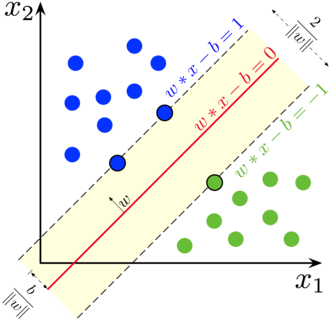

### ¬øY c√≥mo funciona esto con texto? El "Truco del Kernel"

El texto no vive naturalmente en un gr√°fico 2D. Para usar SVM, primero debemos convertir las palabras en vectores num√©ricos (lo haremos con una t√©cnica llamada **TF-IDF**). Una vez que tenemos los vectores, cada rese√±a se convierte en un punto en un espacio de miles de dimensiones.

A veces, los datos no se pueden separar con una l√≠nea recta. Aqu√≠ es donde entra la magia del **kernel**. El "truco del kernel" (Kernel Trick) permite a SVM proyectar los datos a una dimensi√≥n superior donde s√≠ sean linealmente separables, sin tener que hacer el c√°lculo computacionalmente costoso. Es como si lanzaras los puntos al aire para poder pasar una hoja de papel (un plano) entre ellos.

Para texto, el **kernel lineal** suele funcionar sorprendentemente bien y es computacionalmente eficiente.
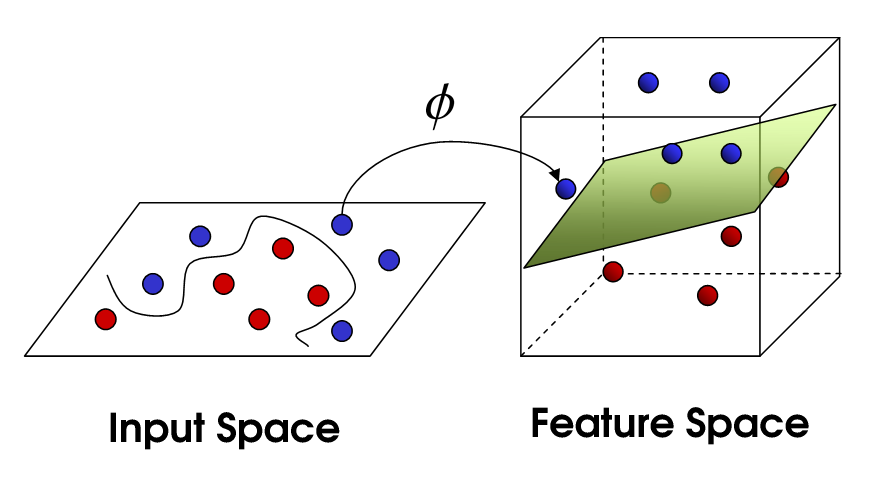

## 2. Preparaci√≥n del Entorno

Primero, necesitamos instalar la librer√≠a de Kaggle para descargar los datos directamente.

In [ ]:
# Instalamos la librer√≠a de Kaggle
!pip install kaggle -q

Ahora, necesitamos subir nuestro archivo `kaggle.json` para autenticarnos.

**Instrucciones para los alumnos:**
1.  Ve a tu perfil de Kaggle (`https://www.kaggle.com/<tu-usuario>/account`).
2.  Haz clic en "Create New API Token". Se descargar√° un archivo llamado `kaggle.json`.
3.  Sube ese archivo usando el siguiente c√≥digo.

In [ ]:
from google.colab import files
import os

# Pedimos que se suba el archivo kaggle.json
if not os.path.exists('/root/.kaggle/kaggle.json'):
    uploaded = files.upload()
    for fn in uploaded.keys():
        # Creamos el directorio y movemos el archivo
        !mkdir -p ~/.kaggle
        !mv {fn} ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    print("¬°Archivo kaggle.json cargado con √©xito!")
else:
    print("El archivo kaggle.json ya existe.")

El archivo kaggle.json ya existe.


## 3. Carga y Exploraci√≥n de Datos (EDA)

Vamos a descargar el famoso dataset "IMDB Dataset of 50K Movie Reviews".

In [ ]:
# Descargamos el dataset desde Kaggle y lo descomprimimos
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -q
!unzip -q imdb-dataset-of-50k-movie-reviews.zip

print("Dataset descargado y descomprimido.")

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Dataset descargado y descomprimido.


Ahora, carguemos los datos en un DataFrame de `pandas`, una herramienta fundamental para la manipulaci√≥n de datos en Python.

In [ ]:
import pandas as pd

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('IMDB Dataset.csv')

# Veamos c√≥mo lucen nuestros datos
print("Tama√±o del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

Tama√±o del dataset: (50000, 2)

Primeras 5 filas:


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Veamos cu√°ntas rese√±as positivas y negativas tenemos. ¬°Un buen balance es clave!

In [ ]:
# Contamos los valores de la columna 'sentiment'
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Como podemos ver, el dataset est√° perfectamente balanceado: 25,000 rese√±as positivas y 25,000 negativas.

Ahora, convirtamos las etiquetas de texto ("positive", "negative") a n√∫meros (1, 0) para que nuestro modelo pueda entenderlas.

In [ ]:
# Mapeamos 'positive' a 1 y 'negative' a 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

## 4. Preprocesamiento de Texto

El texto real es "sucio". Contiene etiquetas HTML, signos de puntuaci√≥n, may√∫sculas/min√∫sculas y palabras comunes (como "y", "el", "un") que no aportan mucho significado.

Crearemos una funci√≥n de limpieza simple usando regex, ¬°nuestro viejo amigo de la clase pasada!

In [ ]:
import re

def limpiar_texto(texto):
    """
    Funci√≥n para limpiar el texto de las rese√±as.
    - Elimina etiquetas HTML.
    - Se queda solo con caracteres alfab√©ticos.
    - Convierte todo a min√∫sculas.
    """
    # Eliminar etiquetas HTML
    texto = re.sub(r'<.*?>', '', texto)
    # Eliminar caracteres no alfab√©ticos
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, re.I|re.A)
    # Convertir a min√∫sculas y quitar espacios extra
    texto = texto.lower().strip()
    return texto

# Aplicamos la funci√≥n de limpieza a toda la columna 'review'
# ¬°Esto puede tardar un par de minutos!
df['review_limpia'] = df['review'].apply(limpiar_texto)

print("Texto limpiado. Veamos un ejemplo:")
print("\nOriginal:\n")
df['review'][0]

Texto limpiado. Veamos un ejemplo:

Original:



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
print("\nLimpia:\n")
df['review_limpia'][0]


Limpia:



'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

### Vectorizaci√≥n con TF-IDF

Ahora viene el paso m√°s importante: convertir el texto en n√∫meros. Usaremos la t√©cnica **TF-IDF** (*Term Frequency-Inverse Document Frequency*).

* **TF (Frecuencia del T√©rmino):** Mide qu√© tan frecuente es una palabra en un documento. Una palabra que aparece muchas veces tiene un valor TF alto.
* **IDF (Frecuencia Inversa del Documento):** Mide qu√© tan "rara" o "especial" es una palabra en todo el conjunto de documentos. Palabras muy comunes como "the" o "a" aparecen en casi todos los documentos, por lo que tendr√°n un IDF bajo. Palabras como "spielberg" o "sci-fi" son m√°s espec√≠ficas y tendr√°n un IDF alto.

El valor TF-IDF es simplemente la multiplicaci√≥n de ambos. Esto le da m√°s importancia a las palabras que son frecuentes en una rese√±a espec√≠fica pero raras en el resto.
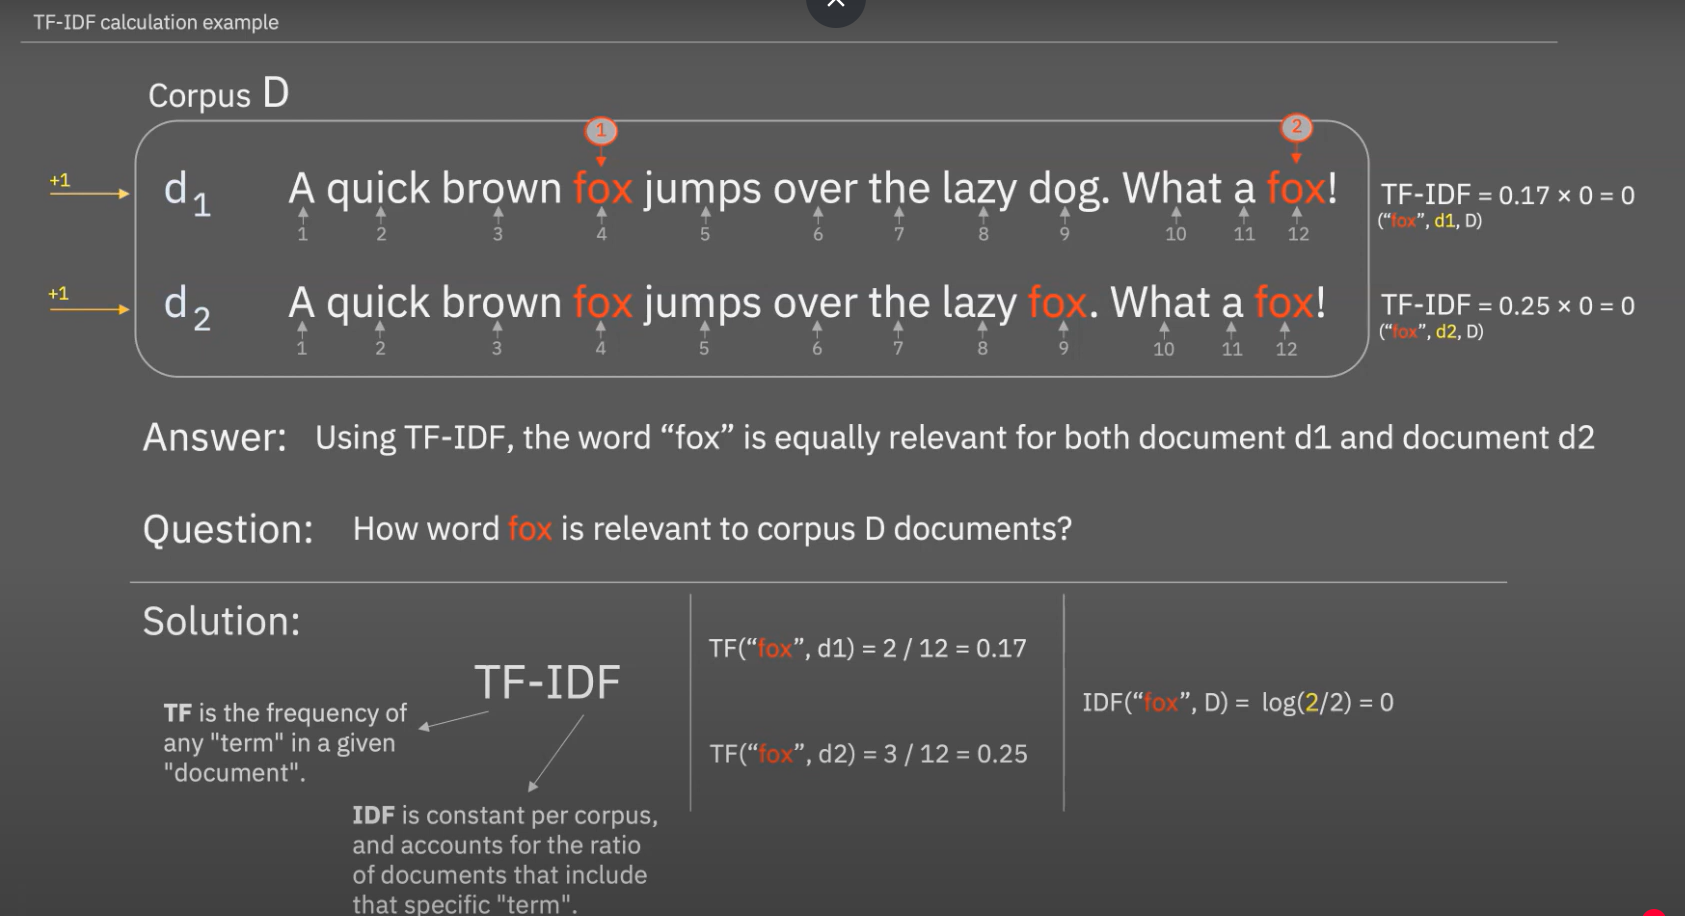

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializamos el vectorizador TF-IDF
# - stop_words='english': para eliminar palabras comunes en ingl√©s (the, a, is...)
# - max_features=5000: para quedarnos solo con las 5000 palabras m√°s importantes y evitar que el modelo sea demasiado complejo
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Aplicamos el vectorizador a nuestras rese√±as limpias
X = tfidf_vectorizer.fit_transform(df['review_limpia'])

# La 'y' es nuestra variable objetivo (el sentimiento)
y = df['sentiment']

# Veamos las dimensiones de nuestra matriz de caracter√≠sticas
print("Dimensiones de la matriz TF-IDF (X):", X.shape)

Dimensiones de la matriz TF-IDF (X): (50000, 5000)


In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. Entrenamiento del Modelo SVM

Ahora, la parte divertida. Vamos a dividir nuestros datos en dos conjuntos:
* **Conjunto de entrenamiento (Training set):** Lo usaremos para "ense√±arle" al modelo SVM. (80% de los datos)
* **Conjunto de prueba (Test set):** Lo usaremos para evaluar qu√© tan bien aprendi√≥ el modelo, usando datos que nunca ha visto. (20% de los datos)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos
# test_size=0.2 indica que el 20% de los datos ser√°n para prueba
# random_state=42 asegura que la divisi√≥n sea siempre la misma, para que los resultados sean reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tama√±o del conjunto de entrenamiento:", X_train.shape)
print("Tama√±o del conjunto de prueba:", X_test.shape)

Tama√±o del conjunto de entrenamiento: (40000, 5000)
Tama√±o del conjunto de prueba: (10000, 5000)


In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Ahora, importamos, inicializamos y entrenamos nuestro clasificador SVM. Usaremos `LinearSVC`, que es una implementaci√≥n de SVM optimizada para casos donde el n√∫mero de muestras es mucho mayor que el n√∫mero de caracter√≠sticas, ¬°justo como el nuestro!

In [ ]:
from sklearn.svm import LinearSVC

# 1. Creamos una instancia del clasificador SVM
svm_classifier = LinearSVC(random_state=42)

# 2. Entrenamos el clasificador con los datos de entrenamiento
print("Entrenando el modelo SVM... ¬°Esto puede tomar un momento!")
svm_classifier.fit(X_train, y_train)
print("¬°Modelo entrenado!")

Entrenando el modelo SVM... ¬°Esto puede tomar un momento!
¬°Modelo entrenado!


## 6. Evaluaci√≥n del Modelo

El modelo est√° entrenado, pero... ¬øfunciona bien? Vamos a usar los datos de prueba (`X_test`) que el modelo nunca ha visto para hacer predicciones y compararlas con las etiquetas reales (`y_test`).

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacemos predicciones sobre el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calculamos la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

# Imprimimos un reporte de clasificaci√≥n m√°s detallado
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

Exactitud del modelo: 87.31%

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

    Negativo       0.88      0.86      0.87      4961
    Positivo       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Una exactitud de casi el 90% es ¬°excelente! El reporte nos da m√°s detalles:
* **Precision:** De todas las veces que el modelo predijo "Positivo", ¬øqu√© porcentaje acert√≥?
* **Recall (Sensibilidad):** De todas las rese√±as que eran realmente "Positivas", ¬øqu√© porcentaje logr√≥ identificar el modelo?
* **F1-Score:** Es una media arm√≥nica de Precision y Recall. Es √∫til para tener una sola m√©trica que combine ambas.

### Matriz de Confusi√≥n

Una de las mejores formas de visualizar el rendimiento de un clasificador es con una **matriz de confusi√≥n**.

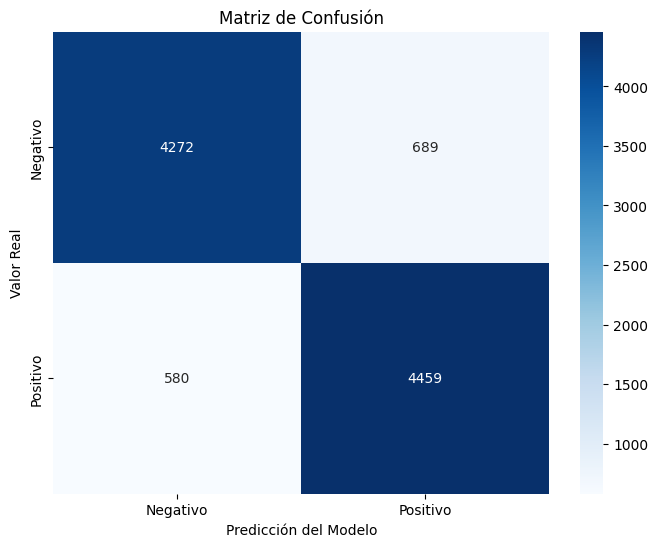

In [ ]:
# Generamos la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicci√≥n del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

**¬øC√≥mo leer la matriz?**
* **Esquina superior-izquierda (Verdaderos Negativos):** N√∫mero de rese√±as negativas que el modelo clasific√≥ correctamente como negativas.
* **Esquina inferior-derecha (Verdaderos Positivos):** N√∫mero de rese√±as positivas que el modelo clasific√≥ correctamente como positivas.
* **Esquina superior-derecha (Falsos Positivos):** N√∫mero de rese√±as negativas que el modelo clasific√≥ incorrectamente como positivas.
* **Esquina inferior-izquierda (Falsos Negativos):** N√∫mero de rese√±as positivas que el modelo clasific√≥ incorrectamente como negativas.

Como vemos, el modelo es muy bueno, pero no es perfecto. ¬°Identificar estos errores es clave para mejorar!

In [ ]:
y_test.index

Index([33553,  9427,   199, 12447, 39489, 42724, 10822, 49498,  4144, 36958,
       ...
       29598, 43515, 15832, 37692, 26859, 28567, 25079, 18707, 15200,  5857],
      dtype='int64', length=10000)

In [ ]:
df_resultados = pd.DataFrame({
    'Rese√±a': df.loc[y_test.index, 'review'],
    'Categor√≠a Real': y_test.map({1: 'Positivo üëç', 0: 'Negativo üëé'}),
    'Predicci√≥n del Modelo': pd.Series(y_pred, index=y_test.index).map({1: 'Positivo üëç', 0: 'Negativo üëé'})
})

df_resultados.head(10)

Rese√±a Categor√≠a Real  \
33553  I really liked this Summerslam due to the look...     Positivo üëç   
9427   Not many television shows appeal to quite as m...     Positivo üëç   
199    The film quickly gets to a major chase scene w...     Negativo üëé   
12447  Jane Austen would definitely approve of this o...     Positivo üëç   
39489  Expectations were somewhat high for me when I ...     Negativo üëé   
42724  I've watched this movie on a fairly regular ba...     Positivo üëç   
10822  For once a story of hope highlighted over the ...     Positivo üëç   
49498  Okay, I didn't get the Purgatory thing the fir...     Positivo üëç   
4144   I was very disappointed with this series. It h...     Negativo üëé   
36958  The first 30 minutes of Tinseltown had my fing...     Negativo üëé   

      Predicci√≥n del Modelo  
33553            Negativo üëé  
9427             Positivo üëç  
199              Negativo üëé  
12447            Positivo üëç  
39489            Negativo üëé  
42724            Positivo üëç  
10822            Positivo üëç  
49498            Negativo üëé  
4144             Negativo üëé  
36958            Negativo üëé

In [ ]:
df_resultados[df_resultados['Categor√≠a Real'] != df_resultados['Predicci√≥n del Modelo']]

Rese√±a Categor√≠a Real  \
33553  I really liked this Summerslam due to the look...     Positivo üëç   
49498  Okay, I didn't get the Purgatory thing the fir...     Positivo üëç   
6113   The production quality, cast, premise, authent...     Positivo üëç   
33109  Three kids are born during a solar eclipse and...     Positivo üëç   
14644  Eyeliner was worn nearly 6000 years ago in Egy...     Positivo üëç   
...                                                  ...            ...   
40110  The film is very complete in what it is, keepi...     Positivo üëç   
29598  Trekkies is really not a movie about Star Trek...     Negativo üëé   
15832  Since the start of her career in the 70's and ...     Positivo üëç   
37692  First of all, the genre of this movie isn't co...     Negativo üëé   
15200  As far as films go, this is likable enough. En...     Negativo üëé   

      Predicci√≥n del Modelo  
33553            Negativo üëé  
49498            Negativo üëé  
6113             Negativo üëé  
33109            Negativo üëé  
14644            Negativo üëé  
...                     ...  
40110            Negativo üëé  
29598            Positivo üëç  
15832            Negativo üëé  
37692            Positivo üëç  
15200            Positivo üëç  

[1269 rows x 3 columns]

## 7. Desaf√≠o Final: ¬°A Clasificar!

¬°Ahora es tu turno! Escribe una rese√±a (buena o mala) de tu pel√≠cula favorita y veamos c√≥mo la clasifica nuestro modelo.

**Instrucciones:**
1.  Escribe tu rese√±a en la variable `mi_rese√±a`.
2.  Ejecuta la celda para ver la predicci√≥n.

In [ ]:
# EJERCICIO PARA EL ALUMNO

# Escribe tu propia rese√±a aqu√≠
# mi_rese√±a = "This movie was absolutely fantastic! The acting was superb and the plot kept me on the edge of my seat. I would recommend it to everyone."
# mi_rese√±a = "What a waste of time. The plot was boring and the acting was terrible. I almost fell asleep."
# mi_rese√±a = "La pelicula estaba mala happy"
mi_rese√±a = "The best part is when it finishes"


# 1. Limpiamos la rese√±a con nuestra funci√≥n
rese√±a_limpia = limpiar_texto(mi_rese√±a)

# 2. La convertimos en un vector TF-IDF usando el MISMO vectorizador que ya entrenamos
vector_rese√±a = tfidf_vectorizer.transform([rese√±a_limpia])

# 3. Hacemos la predicci√≥n
prediccion = svm_classifier.predict(vector_rese√±a)

# 4. Imprimimos el resultado
if prediccion[0] == 1:
    print("Predicci√≥n: ¬°Positiva! üëç")
else:
    print("Predicci√≥n: ¬°Negativa! üëé")

Predicci√≥n: ¬°Positiva! üëç


In [ ]:
prediccion

array([1])